<h1><center>Jupyter Notebooks: An introduction</center></h1> 
<center>Michelle Hoogenhout</center>


<i><center>GPUG meetup, 13 February 2019</center></i>


## About me

- Head data scientist at Umuzi Academy
- Post-doctoral fellow, paediatric & psychiatric genetics research, University of Cape Town
- PhD Psychology, University of Cape Town

Contact me: michelle.hoogenhout@umuzi.org

Notebook: https://github.com/midnight22/gpug-jupyter-intro

![jupyter](pics/jupyter.jpg)

## Why use jupyter notebooks?
- Interactive exploration of data
- Interactive visualisation
- Easy to turn into reports, html, presentations and dashboards
- Easy to incorporate multiple languages

In [1]:
#general packages
from __future__ import division
import numpy as np 
import pandas as pd
from IPython.display import Image

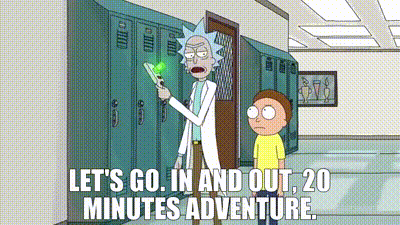

In [2]:
Image("pics/adventure.gif", width = 900)

## Installing jupyter

```
With conda:
    conda install jupyter
    
With pip:
    pip install jupyter  #python 2
    pip3 install jupyter #python 3
    
```

## Starting a new notebook

In terminal:
    `jupyter notebook`
    
File | New Notebook

## It's magic!

In [3]:
%pwd

'C:\\Users\\miche\\Github\\gpug-jupyter-intro'

In [4]:
#less verbose errors
%xmode Plain

Exception reporting mode: Plain


`%run` can execute python code from .py files and can execute other jupyter notebooks

In [5]:
%run hello.ipynb

Hello GPUG! Nice to see you here!


In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%

## Use $LaTeX$

Use $LaTeX$ by adding a dollar sign (same line) or two dollar signs (new line) before and after your text.

$$c = \sqrt{a^2 + b^2}$$


$$( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)})$$

Jupyter supports mutiple cursors! Click and drag your mouse while holding down Alt.


![excited](pics/excited.jpg)


## Load and examine data

In [7]:
#Life expectancy, GDP and population per country per year
#data from gapminder

gdpdata = pd.read_csv("gapminder.tsv", sep='\t')
gdpdata.head()


country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

## Interactive visualisations

![plotly](pics/plotly.png)

     - works with pandas, numpy, scipy, matplotlib, jupyter
     -  R, SQL, Excel
    


In [8]:
import plotly as py #setting online and offline mode
import plotly.graph_objs as go # all the interactive visualisations
#import ipywidgets as widgets
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode() #generate and store graphs locally

Plotly graphs are composed of **traces** and **layouts**.

In [9]:
#Generic example: specify axes and title
layout = go.Layout(
    title = 'My title here',
    yaxis = dict(
        title = 'y title'),
    xaxis = dict(
        title = 'x title'),
    width=900
)

In [10]:
#create bubble chart trace
trace = go.Scatter (
    x = [1, 2, 3], y = [1, 2, 3],
    marker = dict(
        color = ['red', 'blue', 'green'],
        size = [30, 80, 200 ]),
    mode =  'markers')

In [11]:
#plot the final figure
fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

A real example...

In [25]:
#subset 2007 data (latest in dataset)
data2007 = gdpdata.loc[gdpdata['year'] == 2007]
data2007.loc[:,'logGDP'] = np.log(gdpdata['gdpPercap'])

In [13]:
#plot Life Expectancy by GDP
layout_gdp = go.Layout(
    title = 'Life expectancy by GDP per capita',
    yaxis = dict(
        title = 'Life expectancy (years)'),
    xaxis = dict(
        title = 'GDP per capita'),
    width=900,
    height = 350
    )


In [14]:
#create trace objects for each category (continent)
trace_gdp0 = go.Scatter (
    x = data2007['logGDP'][data2007['continent'] == 'Africa'], 
    y = data2007['lifeExp'][data2007['continent'] == 'Africa'],
    marker = dict(
        size = 15
    ),
    mode = 'markers',
    name = 'Africa')

trace_gdp1 = go.Scatter (
    x = data2007['logGDP'][data2007['continent'] == 'Americas'], 
    y = data2007['lifeExp'][data2007['continent'] == 'Americas'],
    marker = dict(
        size = 15
    ),
    mode = 'markers',
    name = 'Americas')

trace_gdp2 = go.Scatter (
    x = data2007['logGDP'][data2007['continent'] == 'Asia'], 
    y = data2007['lifeExp'][data2007['continent'] == 'Asia'],
    marker = dict(
        size = 15
    ),
    mode = 'markers',
    name = 'Asia')


data = [trace_gdp0, trace_gdp1, trace_gdp2]


In [15]:
fig_gdp = go.Figure(data = data, layout = layout_gdp)
py.offline.iplot(fig_gdp)

In [16]:
#pip3 install bubbly
from bubbly.bubbly import bubbleplot 

In [17]:
#ref: https://www.kaggle.com/aashita/guide-to-animated-bubble-charts-using-plotly

figure = bubbleplot(dataset=gdpdata, x_column='gdpPercap', y_column='lifeExp', 
    bubble_column='country', time_column='year', size_column='pop', color_column='continent', 
    x_title="GDP per Capita", y_title="Life Expectancy (years)", title='Life expectancy by GDP per continent',
    x_logscale=True, scale_bubble=3, width = 900)

iplot(figure, config={'scrollZoom': True})

## Incorporate R!

![R](pics/R.jpg)

```
conda install -c r r-essentials
conda install rpy2
```

In [18]:
## imports required from rpy2
from rpy2.robjects import pandas2ri   
pandas2ri.activate()

%load_ext rpy2.ipython
%R require(ggplot2)


array([1], dtype=int32)

In [26]:
%%R -i gdpdata -w 900 -h 480 -u px 
#cell magics only work if they are at the top of the cell

linearModel <- lm(lifeExp ~ log(gdpPercap), gdpdata)
s <- capture.output(summary(linearModel)) #this prints to the console in Windows w/out capture output

In [20]:
a = %R s
for line in a[2:-1]:
         print(line)

lm(formula = lifeExp ~ log(gdpPercap), data = gdpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.778  -4.204   1.212   4.658  19.285 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9.1009     1.2277  -7.413 1.93e-13 ***
log(gdpPercap)   8.4051     0.1488  56.500  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.62 on 1702 degrees of freedom
Multiple R-squared:  0.6522,	Adjusted R-squared:  0.652 
F-statistic:  3192 on 1 and 1702 DF,  p-value: < 2.2e-16


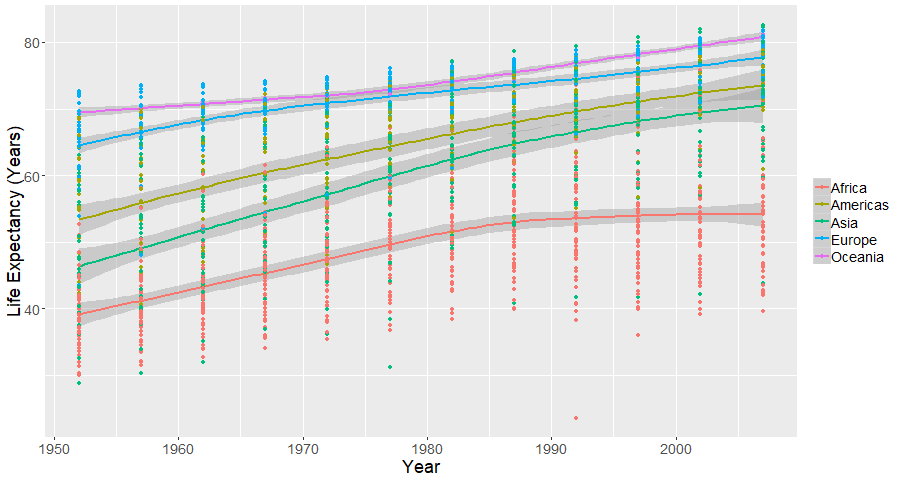

In [21]:
%%R -w 900 -h 480
#w and h set the dimensions of the output

ggplot(gdpdata, aes(x = year, y = lifeExp, color = continent)) + 
    geom_smooth() +
    geom_point() +
    labs( x = "Year", y = "Life Expectancy (Years)") +
    theme(text = element_text(size=18), legend.title = element_blank())


## Use timeit in your code blocks

In [22]:
variables = ['lifeExp', 'pop', 'gdpPercap']

#compare speed of pd.apply vs for loop
def apply_mean():
    dpdata[variables].apply(np.mean, axis = 0)

def loop_mean():
    for variable in variables:
        np.mean(gdpdata[variable])
        
%timeit apply_mean
%timeit loop_mean


22.5 ns ± 2.44 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
19.1 ns ± 1.22 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Turn your notebook into a presentation with RISE

Install RISE with conda

`conda install -c conda-forge rise`

or with pip (not recommended)

`
pip install RISE
jupyter-nbextension install rise --py --sys-prefix # install JS and CSS as needed
`

## Export to html

## Tidy things up: Hide code blocks

- Add javascript scripting to top of notebook as Raw NBConvert cell to toggle hiding code.
- Add a preloader so that code is not visible while loading.

From Chris Said @ The File Drawer: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

## Embed videos, pictures, pdfs, and more  

In [23]:
from IPython.display import IFrame, YouTubeVideo
IFrame('https://jupyter.org/documentation', width=950, height=450)

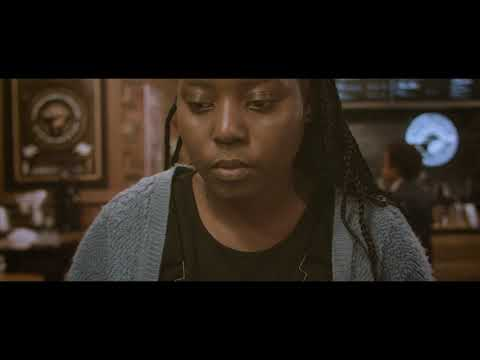

In [24]:
YouTubeVideo("oWHdTyfI87s", width = 800, height = 400)

## Exiting and closing the kernel

File | Close and halt

## Beautiful notebook examples

- https://github.com/jakevdp/PythonDataScienceHandbook

- https://nbviewer.jupyter.org/github/lrhgit/uqsa_tutorials/blob/master/index.ipynb

- https://nbviewer.jupyter.org/github/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping/blob/master/K_Nearest_Neighbor_Dynamic_Time_Warping.ipynb


![umuzi](pics/umuzi_broad.png)